In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits


In [2]:
x,y = load_digits(return_X_y=True)
y = y.reshape(-1,1)
x.shape,y.shape

((1797, 64), (1797, 1))

In [3]:

X_random = np.random.randint(0, 16, (180, 64))
Y_random = np.full((180,1),10)
X_random.shape,Y_random.shape


((180, 64), (180, 1))

In [4]:
x = np.concatenate([x, X_random], axis=0) 
y = np.concatenate([y, Y_random], axis=0)  
x.shape,y.shape

((1977, 64), (1977, 1))

In [5]:
data = load_digits(as_frame=True)
df = data.frame 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [7]:
model = LogisticRegression(solver='liblinear',max_iter=100000 ,C=0.3)
model.fit(X_train,y_train.reshape(-1))

LogisticRegression(C=0.3, max_iter=100000, solver='liblinear')

In [8]:
model.score(X_train,y_train)

0.9962049335863378

In [9]:
model.score(X_test,y_test)

0.9545454545454546

In [10]:
p = model.predict(X_test)
p[1]

np.int64(1)

In [11]:
p = model.predict_proba(X_test)
p

array([[2.12694842e-10, 1.25117435e-07, 4.96829780e-06, ...,
        6.78617685e-05, 5.91337133e-03, 8.46344171e-07],
       [2.30223822e-12, 9.99092070e-01, 4.29862466e-06, ...,
        3.74410946e-05, 1.06293683e-06, 3.43878863e-04],
       [2.63817253e-08, 4.13602430e-02, 7.11636859e-05, ...,
        9.58567040e-01, 2.18902126e-07, 2.80143035e-07],
       ...,
       [9.72516313e-09, 3.65197344e-09, 2.62166348e-03, ...,
        3.38990638e-11, 9.36052115e-16, 9.97378057e-01],
       [2.55218467e-12, 9.92570056e-01, 1.72034519e-04, ...,
        7.15524207e-03, 7.82443818e-08, 1.66354755e-06],
       [1.42743240e-10, 9.65411681e-01, 1.12810412e-06, ...,
        3.45700333e-02, 9.40272047e-11, 6.94915285e-07]], shape=(396, 11))

In [12]:
def pre(x_item):
    p = model.predict_proba(x_item)
    index_of_not_detection=[]
    for idx,i in enumerate(p):
        index = i[i.argmax()]
        if index>0.50:
            print(i.argmax()) 
        else :            
            index_of_not_detection.append(idx)
            # print(10)
    return index_of_not_detection

In [13]:
v = np.random.randint(0,17,64).reshape(1, -1)
pre(v)

10


[]

In [14]:
index_of_not_detection = pre(X_test)

3
1
8
6
5
1
4
4
3
0
4
7
8
0
7
6
9
8
9
9
3
2
8
1
0
5
10
7
4
5
3
7
8
2
0
1
3
0
4
10
7
6
8
9
3
1
1
4
6
1
6
0
2
8
7
9
10
10
0
0
1
10
4
7
1
5
8
6
10
7
4
6
1
0
1
6
6
5
8
3
3
9
8
6
5
7
8
7
6
10
5
7
6
5
6
3
8
9
4
1
2
6
1
5
3
9
0
10
8
4
10
8
4
0
4
1
7
5
7
2
8
10
10
3
9
3
3
7
1
9
0
1
5
2
10
1
2
4
2
3
0
1
2
6
4
2
10
4
4
4
7
2
10
8
10
4
9
6
8
9
3
8
8
10
2
10
5
1
10
0
2
3
9
5
5
9
6
7
0
6
3
5
4
9
7
2
6
4
10
2
4
1
0
4
7
8
8
3
8
4
6
6
4
4
7
2
1
7
1
5
1
7
6
0
5
7
4
9
1
10
3
4
2
7
5
1
5
10
3
3
8
1
0
7
0
6
1
8
6
3
3
6
1
4
10
4
1
1
8
5
3
3
8
9
5
2
1
5
3
8
5
0
3
4
8
8
2
6
7
8
10
1
3
3
1
10
7
1
9
0
2
7
8
0
1
9
6
1
7
6
0
4
5
7
7
5
2
8
9
3
1
2
10
8
3
1
8
6
8
9
1
4
9
10
3
3
2
1
7
7
3
4
0
5
10
3
3
5
8
8
3
1
1
0
1
6
7
9
4
0
8
0
3
3
2
7
9
3
3
7
6
8
4
2
8
5
10
6
8
5
5
0
5
9
9
1
7
2
3
3
7
6
7
8
9
6
4
7
0
10
9
6
5
9
3
2
3
2
10
1
1


In [15]:
len(index_of_not_detection)

5

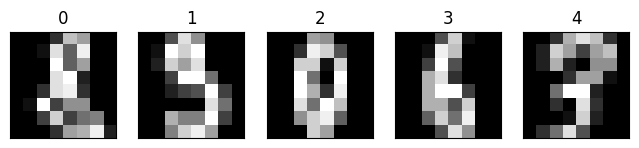

In [31]:
plt.figure(figsize=(8,8))

for idx,item in enumerate(X_test[index_of_not_detection]):
    plt.subplot(5,5,idx+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(idx)
    plt.imshow(item.reshape(8,8),'gray')
